<a href="https://colab.research.google.com/github/smartie20/smartie20/blob/main/ASDproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/Classroom/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: AutismDataset/consolidated/Autistic/0881.jpg  
  inflating: AutismDataset/consolidated/Autistic/0882.jpg  
  inflating: AutismDataset/consolidated/Autistic/0883.jpg  
  inflating: AutismDataset/consolidated/Autistic/0884.jpg  
  inflating: AutismDataset/consolidated/Autistic/0885.jpg  
  inflating: AutismDataset/consolidated/Autistic/0886.jpg  
  inflating: AutismDataset/consolidated/Autistic/0887.jpg  
  inflating: AutismDataset/consolidated/Autistic/0888.jpg  
  inflating: AutismDataset/consolidated/Autistic/0889.jpg  
  inflating: AutismDataset/consolidated/Autistic/0890.jpg  
  inflating: AutismDataset/consolidated/Autistic/0891.jpg  
  inflating: AutismDataset/consolidated/Autistic/0892.jpg  
  inflating: AutismDataset/consolidated/Autistic/0893.jpg  
  inflating: AutismDataset/consolidated/Autistic/0894.jpg  
  inflating: AutismDataset/consolidated/Autistic/0895.jpg  
  inflating: AutismDataset/consolidated/Autistic/

In [ ]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import keras,os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers , layers, applications
import seaborn as sns

In [ ]:
filenames = os.listdir("/content/AutismDataset/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

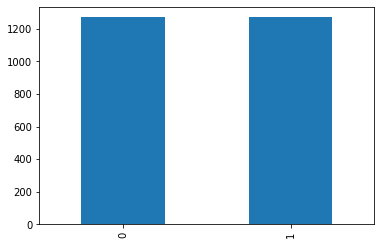

In [ ]:
train_df['category'].value_counts().plot.bar()

In [ ]:
test_filenames = os.listdir("/content/AutismDataset/test")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

test_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
test_df

,filename,category
0,Non_Autistic.579.jpg,0
1,Non_Autistic.853.jpg,0
2,Non_Autistic.224.jpg,0
3,Autistic.669.jpg,1
4,Autistic.1073.jpg,1
...,...,...
2535,Autistic.1129.jpg,1
2536,Non_Autistic.1230.jpg,0
2537,Autistic.744.jpg,1
2538,Autistic.825.jpg,1


In [ ]:
image_size = 224
input_shape = (image_size, image_size, 3)

#Hyperparameters
epochs = 10
batch_size = 32

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 256 hidden units and ReLU activation
x = Dense(256, activation=tf.nn.leaky_relu)(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
              optimizer= tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# Prepare Test and Train Data
train_df, validate_df = train_test_split(train_df, test_size=0.05)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [ ]:
# Training Generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/AutismDataset/train", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2413 validated image filenames belonging to 2 classes.


In [ ]:
# Validation Generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/AutismDataset/train", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 127 validated image filenames belonging to 2 classes.


In [ ]:
#Fit Model
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
75/75 [==============================] - 57s 604ms/step - loss: 0.7077 - accuracy: 0.5821 - val_loss: 0.5350 - val_accuracy: 0.7396
Epoch 2/10
75/75 [==============================] - 44s 579ms/step - loss: 0.5796 - accuracy: 0.7001 - val_loss: 0.4993 - val_accuracy: 0.7812
Epoch 3/10
75/75 [==============================] - 42s 559ms/step - loss: 0.5225 - accuracy: 0.7417 - val_loss: 0.4642 - val_accuracy: 0.7708
Epoch 4/10
75/75 [==============================] - 42s 557ms/step - loss: 0.4716 - accuracy: 0.7740 - val_loss: 0.3849 - val_accuracy: 0.8021
Epoch 5/10
75/75 [==============================] - 42s 553ms/step - loss: 0.4761 - accuracy: 0.7803 - val_loss: 0.5280 - val_accuracy: 0.7396
Epoch 6/10
75/75 [==============================] - 42s 552ms/step - loss: 0.4670 - accuracy: 0.7791 - val_loss: 0.5105 - val_accuracy: 0.7604
Epoch 7/10
75/75 [==============================] - 42s 551ms/step - loss: 0.4159 - accuracy: 0.8076 - val_loss: 0.5557 - val_accuracy: 0.7188

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test: accuracy = 0.854167  ;  loss = 0.372419 


In [ ]:
#Prepare Testing
test_filenames = os.listdir("/content/AutismDataset/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
#Create Testing Generator
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/AutismDataset/test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 300 validated image filenames.


In [ ]:
# Predict
threshold = 0.5
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


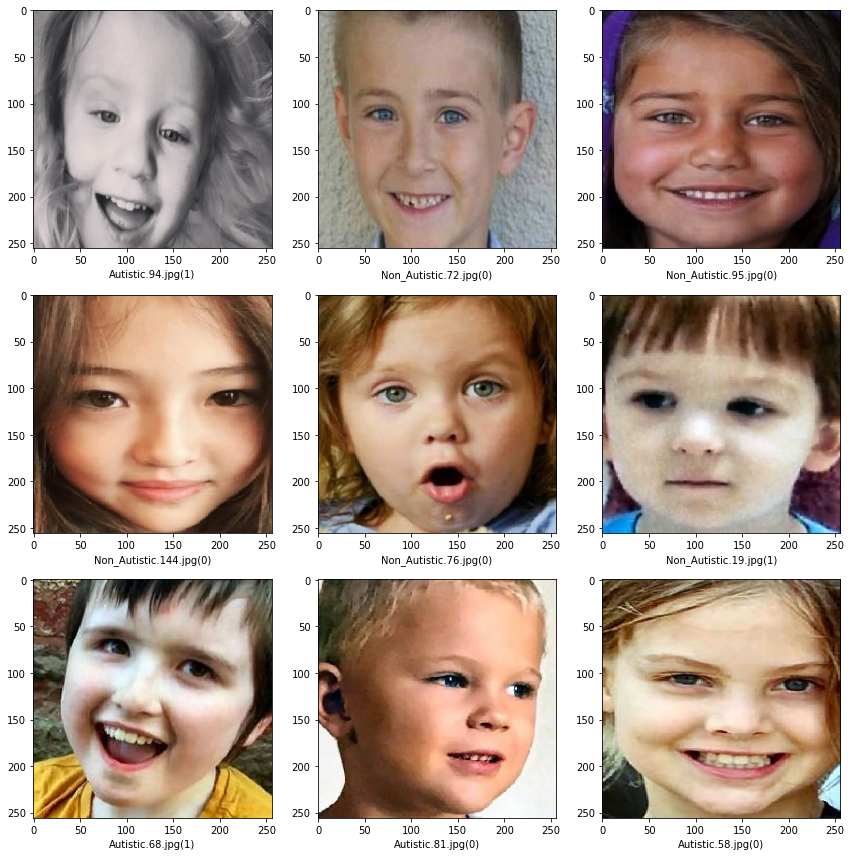

In [ ]:
#See Predicted Result
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/AutismDataset/test/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '(Test data)')

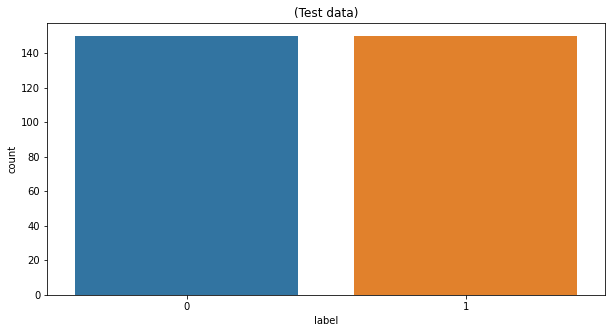

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('ASD_test_statistics.csv', index=False)
plt.figure(figsize=(10,5))
sns.countplot(submission_df['label'])
plt.title("(Test data)")